# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    
    print(next_state)
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

[0.         1.         0.         0.         0.28150648 0.
 1.         0.         0.         0.15250857 0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.17787176 0.         1.         0.         0.
 0.27389896 0.         1.         0.         0.         0.1506419
 0.         1.         0.         0.         0.17590505 0.
 0.        ]
[0.         1.         0.         0.         0.16895208 0.
 1.         0.         0.         0.20073599 0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58016348 0.         1.         0.         0.         0.16089138
 0.         1.         0.         0.         0.31775296 0.
 0.        ]
[0.         1.         0.         0.         0.28150636 0.
 1.         0.         0.         0.15250859 0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.17787172 0.         1.         0.         0.
 0.27389905 0. 

[ 0.          1.          0.          0.          0.09655632  0.
  1.          0.          0.          0.31227273  0.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.10830168  0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.15673798
  1.          0.          0.          0.          0.55907267  0.45317012
 -3.44849992]
[0.         1.         0.         0.         0.09462552 0.
 1.         0.         0.         0.30602834 0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.10613601 0.         0.         0.         1.
 0.         0.         1.         0.         0.         0.15360373
 1.         0.         0.         0.         0.55641454 0.21978366
 5.74388885]
[0.         1.         0.         0.         0.08957659 0.
 1.         0.         0.         0.28969958 1.         0.
 0.         0.         0.98735601 0.         1.         0.
 0.         0.100472

[ 0.          1.          0.          0.          0.08089287  0.
  1.          0.          0.          0.26161525  0.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.09073286  0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.1313117
  1.          0.          0.          0.          0.61157924  2.53019857
 -1.31559348]
[ 0.          1.          0.          0.          0.08085996  0.
  1.          0.          0.          0.26150882  0.          0.
  0.          1.          0.          0.          1.          0.
  0.          0.09069595  0.          0.          0.          1.
  0.          0.          1.          0.          0.          0.13125829
  1.          0.          0.          0.          0.62299627  1.20642292
 -7.35013723]
[ 0.          1.          0.          0.          0.09314642  0.
  1.          0.          0.          0.1106695   0.          0.
  1.          0.          0.894

[ 0.          1.          0.          0.          0.03174317  0.
  1.          0.          0.          0.01719717  0.          1.
  0.          0.          0.12086821  0.          1.          0.
  0.          0.02005715  0.          1.          0.          0.
  0.03088543  0.          1.          0.          0.          0.01698667
  0.          1.          0.          0.          0.01983541 -1.19194841
 -5.62889004]
[ 0.          1.          0.          0.          0.02823845  0.
  1.          0.          0.          0.03355082  1.          0.
  0.          0.          0.46245679  0.          1.          0.
  0.          0.0249673   0.          1.          0.          0.
  0.47641698  0.          1.          0.          0.          0.02689122
  0.          1.          0.          0.          0.05310898 -2.34571671
 -2.60920405]
[ 0.          1.          0.          0.          0.02602623  0.
  1.          0.          0.          0.03092242  1.          0.
  0.          0.          0.45

KeyboardInterrupt: 

In [5]:
from collections import deque
from dqn_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(state_size=37, action_size=4, seed=0)

Episode 1	Average Score: 0.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: -0.33
Episode 4	Average Score: -0.50
Episode 5	Average Score: -0.60
Episode 6	Average Score: -0.83
Episode 7	Average Score: -0.57
Episode 8	Average Score: -0.50
Episode 9	Average Score: -0.33
Episode 10	Average Score: -0.30
Episode 11	Average Score: -0.27
Episode 12	Average Score: -0.25
Episode 13	Average Score: -0.31
Episode 14	Average Score: -0.29
Episode 15	Average Score: -0.13
Episode 16	Average Score: -0.12
Episode 17	Average Score: -0.12
Episode 18	Average Score: -0.11
Episode 19	Average Score: -0.11
Episode 20	Average Score: -0.10
Episode 21	Average Score: -0.05
Episode 22	Average Score: -0.14
Episode 23	Average Score: -0.09
Episode 24	Average Score: -0.12
Episode 25	Average Score: -0.12
Episode 26	Average Score: -0.15
Episode 27	Average Score: -0.15
Episode 28	Average Score: -0.18
Episode 29	Average Score: -0.21
Episode 30	Average Score: -0.20
Episode 31	Average Score: -0.26
Episode 32	Average 

Episode 259	Average Score: 6.34
Episode 260	Average Score: 6.41
Episode 261	Average Score: 6.48
Episode 262	Average Score: 6.51
Episode 263	Average Score: 6.50
Episode 264	Average Score: 6.50
Episode 265	Average Score: 6.59
Episode 266	Average Score: 6.59
Episode 267	Average Score: 6.59
Episode 268	Average Score: 6.65
Episode 269	Average Score: 6.72
Episode 270	Average Score: 6.76
Episode 271	Average Score: 6.76
Episode 272	Average Score: 6.83
Episode 273	Average Score: 6.83
Episode 274	Average Score: 6.88
Episode 275	Average Score: 6.86
Episode 276	Average Score: 6.94
Episode 277	Average Score: 6.90
Episode 278	Average Score: 6.91
Episode 279	Average Score: 6.91
Episode 280	Average Score: 6.97
Episode 281	Average Score: 7.05
Episode 282	Average Score: 6.99
Episode 283	Average Score: 7.09
Episode 284	Average Score: 7.20
Episode 285	Average Score: 7.23
Episode 286	Average Score: 7.25
Episode 287	Average Score: 7.29
Episode 288	Average Score: 7.35
Episode 289	Average Score: 7.35
Episode 

Episode 512	Average Score: 12.87
Episode 513	Average Score: 12.97
Episode 514	Average Score: 12.97
Episode 515	Average Score: 13.05
Episode 516	Average Score: 13.02
Episode 517	Average Score: 12.98
Episode 518	Average Score: 12.97
Episode 519	Average Score: 12.96
Episode 520	Average Score: 12.96
Episode 521	Average Score: 12.96
Episode 522	Average Score: 12.96
Episode 523	Average Score: 13.01
Episode 524	Average Score: 13.00
Episode 525	Average Score: 12.97
Episode 526	Average Score: 12.90
Episode 527	Average Score: 12.94
Episode 528	Average Score: 12.98
Episode 529	Average Score: 13.02
Episode 530	Average Score: 13.05
Episode 531	Average Score: 13.03
Episode 532	Average Score: 13.05
Episode 533	Average Score: 13.00
Episode 534	Average Score: 13.07
Episode 535	Average Score: 13.12
Episode 536	Average Score: 13.19
Episode 537	Average Score: 13.19
Episode 538	Average Score: 13.10
Episode 539	Average Score: 13.14
Episode 540	Average Score: 13.14
Episode 541	Average Score: 13.18
Episode 54

Episode 761	Average Score: 15.07
Episode 762	Average Score: 15.07
Episode 763	Average Score: 15.06
Episode 764	Average Score: 15.05
Episode 765	Average Score: 15.08
Episode 766	Average Score: 15.11
Episode 767	Average Score: 15.20
Episode 768	Average Score: 15.24
Episode 769	Average Score: 15.22
Episode 770	Average Score: 15.23
Episode 771	Average Score: 15.28
Episode 772	Average Score: 15.30
Episode 773	Average Score: 15.27
Episode 774	Average Score: 15.40
Episode 775	Average Score: 15.41
Episode 776	Average Score: 15.41
Episode 777	Average Score: 15.47
Episode 778	Average Score: 15.51
Episode 779	Average Score: 15.53
Episode 780	Average Score: 15.46
Episode 781	Average Score: 15.49
Episode 782	Average Score: 15.47
Episode 783	Average Score: 15.44
Episode 784	Average Score: 15.50
Episode 785	Average Score: 15.44
Episode 786	Average Score: 15.33
Episode 787	Average Score: 15.43
Episode 788	Average Score: 15.35
Episode 789	Average Score: 15.40
Episode 790	Average Score: 15.46
Episode 79

Episode 1009	Average Score: 15.63
Episode 1010	Average Score: 15.62
Episode 1011	Average Score: 15.69
Episode 1012	Average Score: 15.81
Episode 1013	Average Score: 15.89
Episode 1014	Average Score: 15.84
Episode 1015	Average Score: 15.84
Episode 1016	Average Score: 15.91
Episode 1017	Average Score: 15.94
Episode 1018	Average Score: 15.98
Episode 1019	Average Score: 15.95
Episode 1020	Average Score: 16.02
Episode 1021	Average Score: 16.12
Episode 1022	Average Score: 16.10
Episode 1023	Average Score: 16.13
Episode 1024	Average Score: 16.14
Episode 1025	Average Score: 16.15
Episode 1026	Average Score: 16.20
Episode 1027	Average Score: 16.18
Episode 1028	Average Score: 16.21
Episode 1029	Average Score: 16.19
Episode 1030	Average Score: 16.19
Episode 1031	Average Score: 16.20
Episode 1032	Average Score: 16.32
Episode 1033	Average Score: 16.34
Episode 1034	Average Score: 16.33
Episode 1035	Average Score: 16.31
Episode 1036	Average Score: 16.30
Episode 1037	Average Score: 16.29
Episode 1038	A

Episode 1250	Average Score: 15.39
Episode 1251	Average Score: 15.36
Episode 1252	Average Score: 15.32
Episode 1253	Average Score: 15.32
Episode 1254	Average Score: 15.25
Episode 1255	Average Score: 15.17
Episode 1256	Average Score: 15.16
Episode 1257	Average Score: 15.24
Episode 1258	Average Score: 15.21
Episode 1259	Average Score: 15.09
Episode 1260	Average Score: 15.10
Episode 1261	Average Score: 14.99
Episode 1262	Average Score: 14.96
Episode 1263	Average Score: 14.97
Episode 1264	Average Score: 14.94
Episode 1265	Average Score: 14.97
Episode 1266	Average Score: 14.91
Episode 1267	Average Score: 14.90
Episode 1268	Average Score: 14.86
Episode 1269	Average Score: 14.87
Episode 1270	Average Score: 14.91
Episode 1271	Average Score: 14.87
Episode 1272	Average Score: 14.79
Episode 1273	Average Score: 14.86
Episode 1274	Average Score: 14.85
Episode 1275	Average Score: 14.85
Episode 1276	Average Score: 14.80
Episode 1277	Average Score: 14.86
Episode 1278	Average Score: 14.82
Episode 1279	A

Episode 1491	Average Score: 16.09
Episode 1492	Average Score: 16.06
Episode 1493	Average Score: 16.07
Episode 1494	Average Score: 16.02
Episode 1495	Average Score: 16.01
Episode 1496	Average Score: 16.07
Episode 1497	Average Score: 16.13
Episode 1498	Average Score: 16.11
Episode 1499	Average Score: 16.11
Episode 1500	Average Score: 16.13
Episode 1501	Average Score: 16.07
Episode 1502	Average Score: 16.11
Episode 1503	Average Score: 16.08
Episode 1504	Average Score: 16.10
Episode 1505	Average Score: 16.09
Episode 1506	Average Score: 16.19
Episode 1507	Average Score: 16.13
Episode 1508	Average Score: 16.10
Episode 1509	Average Score: 16.10
Episode 1510	Average Score: 16.13
Episode 1511	Average Score: 16.15
Episode 1512	Average Score: 16.19
Episode 1513	Average Score: 16.19
Episode 1514	Average Score: 16.16
Episode 1515	Average Score: 16.21
Episode 1516	Average Score: 16.21
Episode 1517	Average Score: 16.17
Episode 1518	Average Score: 16.28
Episode 1519	Average Score: 16.35
Episode 1520	A

Episode 1732	Average Score: 15.65
Episode 1733	Average Score: 15.61
Episode 1734	Average Score: 15.45
Episode 1735	Average Score: 15.55
Episode 1736	Average Score: 15.51
Episode 1737	Average Score: 15.49
Episode 1738	Average Score: 15.52
Episode 1739	Average Score: 15.58
Episode 1740	Average Score: 15.54
Episode 1741	Average Score: 15.62
Episode 1742	Average Score: 15.77
Episode 1743	Average Score: 15.80
Episode 1744	Average Score: 15.78
Episode 1745	Average Score: 15.82
Episode 1746	Average Score: 15.86
Episode 1747	Average Score: 15.84
Episode 1748	Average Score: 15.84
Episode 1749	Average Score: 15.83
Episode 1750	Average Score: 15.74
Episode 1751	Average Score: 15.78
Episode 1752	Average Score: 15.67
Episode 1753	Average Score: 15.63
Episode 1754	Average Score: 15.56
Episode 1755	Average Score: 15.46
Episode 1756	Average Score: 15.40
Episode 1757	Average Score: 15.47
Episode 1758	Average Score: 15.47
Episode 1759	Average Score: 15.51
Episode 1760	Average Score: 15.62
Episode 1761	A

Episode 1973	Average Score: 15.90
Episode 1974	Average Score: 15.88
Episode 1975	Average Score: 15.88
Episode 1976	Average Score: 15.97
Episode 1977	Average Score: 16.03
Episode 1978	Average Score: 15.93
Episode 1979	Average Score: 15.94
Episode 1980	Average Score: 15.88
Episode 1981	Average Score: 15.99
Episode 1982	Average Score: 16.03
Episode 1983	Average Score: 16.01
Episode 1984	Average Score: 16.03
Episode 1985	Average Score: 15.88
Episode 1986	Average Score: 15.95
Episode 1987	Average Score: 15.91
Episode 1988	Average Score: 15.82
Episode 1989	Average Score: 15.74
Episode 1990	Average Score: 15.70
Episode 1991	Average Score: 15.65
Episode 1992	Average Score: 15.64
Episode 1993	Average Score: 15.63
Episode 1994	Average Score: 15.65
Episode 1995	Average Score: 15.67
Episode 1996	Average Score: 15.76
Episode 1997	Average Score: 15.79
Episode 1998	Average Score: 15.71
Episode 1999	Average Score: 15.80
Episode 2000	Average Score: 15.77


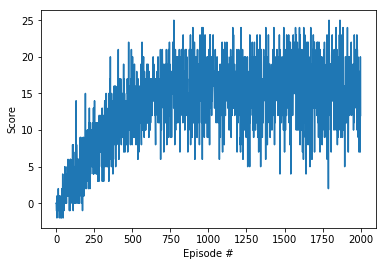

In [6]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]  
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
import torch

In [9]:
torch.save(agent.qnetwork_local.state_dict(), 'model.pth')

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```